In [1]:
import os
import pandas as pd
import numpy as np
from pprint import pprint

PROJ_ROOT = os.path.join(os.pardir)

In [2]:
cmc_data = os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'water_FINAL.csv')

# lc_data = os.path.join(PROJ_ROOT, 
#                          'data',
#                         'processed',
#                          'lc_df.csv')

In [3]:
cmc_df=pd.read_csv(cmc_data,parse_dates={'new_date':['Date','Time']},
                                         usecols=(lambda x: not x.startswith('Unnamed')),
                                         dtype={'HUC12_':str} )

C:\Users\Bryan\Anaconda3\envs\hacktb\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,9,11,13,15,17,21,22,23,24,27,28,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# lc_df=pd.read_csv(lc_data, dtype={'huc12':str})

In [5]:
print(cmc_df.shape)
cmc_df.head()

(2708717, 70)


,new_date,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,FlowStage,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,2018-04-28 12:05:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,W,1-10 knots,MD,POINT (-75.93002800000002 39.480194),020600020206,Bohemia River,24015,Cecil County,MD
1,2018-04-28 12:40:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,W,1-10 knots,MD,POINT (-75.902528 39.480444),020600020206,Bohemia River,24015,Cecil County,MD
2,2018-04-28 13:13:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,S,1-10 knots,MD,POINT (-75.873639 39.466889),020600020206,Bohemia River,24015,Cecil County,MD
3,2018-04-28 13:53:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,SW,1-10 knots,MD,POINT (-75.854444 39.454),020600020206,Bohemia River,24015,Cecil County,MD
4,2018-04-28 14:24:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,SW,1-10 knots,MD,POINT (-75.84352800000001 39.463667),020600020206,Bohemia River,24015,Cecil County,MD


In [6]:
cmc_df.columns

Index(['new_date', 'Agency', 'BiasPC', 'CloudCover', 'Comments', 'Cruise',
       'Database', 'FieldActivityEventType', 'FieldActivityRemark',
       'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12', 'Lab', 'Latitude',
       'Layer', 'Longitude', 'LowerPycnocline', 'MeasureValue', 'Method',
       'ModifiedDate', 'Other Comments', 'Other Conditions', 'Parameter',
       'ParameterName_CBP', 'ParameterName_CMC', 'PrecipType', 'PrecisionPC',
       'Pressure', 'Problem', 'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'TotalDepth', 'Unit', 'UpperPycnocline',
       'Water Color', 'Water Color Description', 'Water Odor',
       'Water Odor Description', 'Water Surfaces', 'WaveHeight',
       'Weather Conditions Day Before Yes

List all values of Nitrogen that are in the dataset. 
Looking at row #15 this means
- CBP Parameter ('ParameterName_CBP' feature) = 'TOTAL NITROGEN'
- CMC Parameter ('ParameterName_CMC' feature) = 'Total Nitrogen ' *Note:extra space at the end*
- CMC Codes & CBP Codes are both in ('Parameter' feature) = 'TN'(CBP) 'TN.1', 'TN.2', 'TN.3' (CMC)


Assumption - maintaining to this list - we will be analyzing equivalent measures. Though - the team has stated the methods are different depending on different CMC codes. TN.1 method is different than TN.2, though they measure the same pollutant on the same scale.

- Check for missing values among the different codes to ensure they are combined correctly
- Check that the units are the same


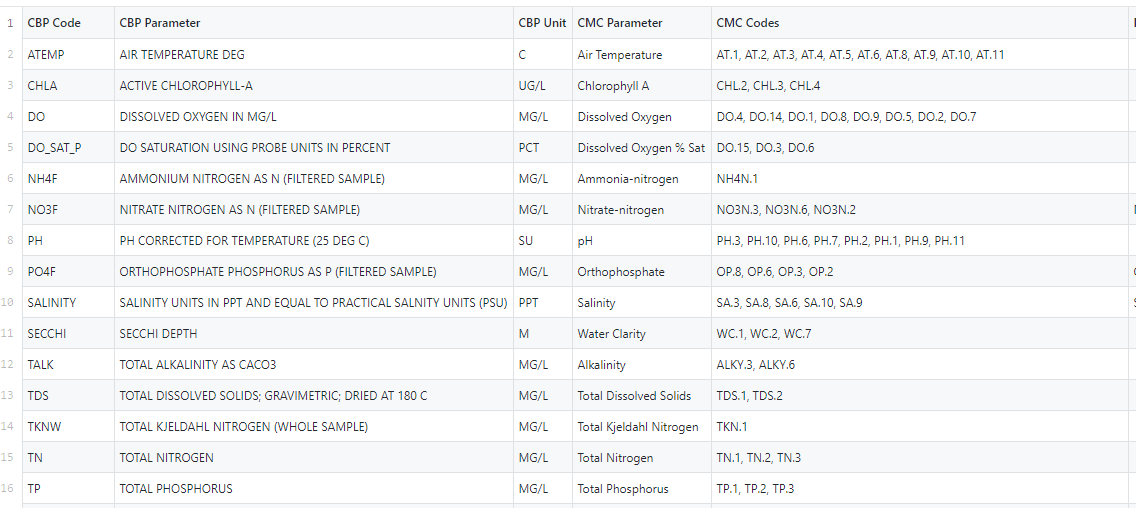

### 112,110 Total Records where ANY of the parameters are listed as Nitrogen

In [7]:
#subset dataframe to include all nitrogen keys for all 3 features
cmc_df[(cmc_df.Parameter.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
     (cmc_df.ParameterName_CBP.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
     (cmc_df.ParameterName_CMC.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen ']))].shape

(112110, 70)

In [8]:
# look all the units of measure of all records
cmc_df[(cmc_df.Parameter.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
     (cmc_df.ParameterName_CBP.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
     (cmc_df.ParameterName_CMC.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen ']))].Unit.str.lower().value_counts()

mg/l    112110
Name: Unit, dtype: int64

all units are measured in mg/L

In [9]:
pprint(cmc_df.Parameter.unique())

array(['CHL.3', 'DO.6', 'NO3N.5', 'SA.9', 'DO.5', 'NO3N.6', 'WC.2',
       'WT.8', 'PH.6', 'CO.8', 'AT.3', 'OP.1', 'WT.1', 'NH4N.1', 'WT.4',
       'AT.11', 'AT.2', 'CHL.1', 'ECOLI.4', 'TP.3', 'NO3N.1', 'ECOLI.6',
       'CO.9', 'WC.7', 'OP.3', 'ECOLI.1', 'TDS.1', 'WT.5', 'WC.5', 'WC.6',
       'AT.1', 'AT.10', 'NO3N.2', 'TDS.3', 'AT.9', 'ENT.2', 'WT.10',
       'TD.1', 'WC.9', 'SA.3', 'SA.6', 'PH.11', 'DO.3', 'NO3N.4', 'DO.4',
       'SA.2', 'TSS.1', 'CO.1', 'PH.10', 'OP.2', 'WC.12', 'CO.4', 'WT.3',
       'WC.1', 'CO.2', 'ALKY.6', 'SA.10', 'PH.8', 'OP.8', 'NO2NO3.1',
       'DO.2', 'DO.7', 'WC.4', 'DO.15', 'TSS.3', 'OP.7', 'WC.8', 'CHL.2',
       'WT.12', 'TN.2', 'CO.5', 'OP.4', 'AT.4', 'TDS.2', 'NO3N.3', 'WT.2',
       'WT.6', 'PH.9', 'SA.8', 'CHL.4', 'WT.9', 'SA.1', 'PH.7', 'PH.1',
       'DO.9', 'TKN.1', 'ENT.1', 'WT.7', 'DO.14', 'AT.5', 'OP.6', 'TP.2',
       'PH.5', 'NO2NO3.4', 'TP.1', 'TN.1', 'PH.4', 'PH.2', 'ECOLI.2',
       'DO.1', 'PH.3', 'AT.6', 'DO.8', 'TN.3', 'WT.13', 'AL

In [10]:
pprint(cmc_df.ParameterName_CBP.unique())

array(['ACTIVE CHLOROPHYLL-A',
       'DO SATURATION USING PROBE UNITS IN PERCENT',
       'Not in CBP Database',
       'SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL SALNITY UNITS (PSU)',
       'DISSOLVED OXYGEN IN MG/L',
       'NITRATE NITROGEN AS N (FILTERED SAMPLE)', 'SECCHI DEPTH',
       'WATER TEMPERATURE DEG', 'PH CORRECTED FOR TEMPERATURE (25 DEG C)',
       'SPECIFIC CONDUCTIVITY', 'AIR TEMPERATURE DEG',
       'AMMONIUM NITROGEN AS N (FILTERED SAMPLE)', 'E.COLI BACTERIA',
       'TOTAL PHOSPHORUS',
       'ORTHOPHOSPHATE PHOSPHORUS AS P (FILTERED SAMPLE)',
       'TOTAL DISSOLVED SOLIDS; GRAVIMETRIC; DRIED AT 180 C',
       'TURBIDITY; JACKSON CANDLE METHOD (FORWARD SCATTER)',
       'TURBIDITY; NEPHELOMETRIC METHOD', 'TOTAL DEPTH',
       'TOTAL SUSPENDED SOLIDS', 'TOTAL ALKALINITY AS CACO3',
       'TURBIDITY TUBE', 'TOTAL NITROGEN',
       'TOTAL KJELDAHL NITROGEN (WHOLE SAMPLE)'], dtype=object)


In [11]:
pprint(cmc_df.ParameterName_CMC.unique())

array(['Chlorophyll a;b;c ', 'Dissolved oxygen % Sat ',
       'Nitrate-nitrogen ', 'Salinity ', 'Dissolved oxygen ',
       'Water Clarity ', 'Water temperature ', 'pH ', 'Conductivity ',
       'Air temperature ', 'Orthophosphate ', 'Ammonia-nitrogen ',
       'Air Temperature ', 'Chlorophyll a ', 'Bacteria [E.Coli] ',
       'Total Phosphorus ', 'Total Dissolved Solids ', 'Enterococcus ',
       'Total Depth ', 'Total Suspended Solids ', 'Alkalinity ',
       'Nitrite-nitrate ', 'Dissolved Oxygen % Sat ', 'Total Nitrogen ',
       'Total Kjeldahl Nitrogen ', 'Water Temperature ', nan],
      dtype=object)


There are other nitrogen measures, but listed as other measured pollutants (different names)

In [12]:
# subset dataframe to only look at the parameter and unit features
n_df=cmc_df[['Parameter','ParameterName_CBP', 'ParameterName_CMC','Unit']]

## Different names of Nitrogen when filtered by Parameter feature

- The Parameter feature captures all nitrogen records 112,110.
- CMC parameter seems to be missing the CMC code records (109,500 records)

In [13]:
#filter to only nitrogen in parameter column
n_df=n_df[n_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])]

In [14]:
# display/count the other parameters
display(n_df[n_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])].ParameterName_CBP.value_counts(dropna=False))
display(n_df[n_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])].ParameterName_CMC.value_counts(dropna=False))
display(n_df[n_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])].Parameter.value_counts(dropna=False))

TOTAL NITROGEN    112110
Name: ParameterName_CBP, dtype: int64

NaN                109500
Total Nitrogen       2610
Name: ParameterName_CMC, dtype: int64

TN      109500
TN.1      2177
TN.3       230
TN.2       203
Name: Parameter, dtype: int64

## Different names of Nitrogen when filtered by CBP Nitrogen

- 'TOTAL NITROGEN' in CBP = 'Total Nitrogen ' in CMC data and other NaN in CMC data
- TOTAL NITROGEN also shows that the parametername cmc is missing 109K records

In [15]:
cbpn=cmc_df[['Parameter','ParameterName_CBP', 'ParameterName_CMC','Unit']]

In [16]:
cbpn[cbpn.ParameterName_CBP=='TOTAL NITROGEN'].ParameterName_CBP.value_counts(dropna=False)

TOTAL NITROGEN    112110
Name: ParameterName_CBP, dtype: int64

In [17]:
display(cbpn[cbpn.ParameterName_CBP=='TOTAL NITROGEN'].ParameterName_CBP.value_counts(dropna=False))
display(cbpn[cbpn.ParameterName_CBP=='TOTAL NITROGEN'].ParameterName_CMC.value_counts(dropna=False))
display(cbpn[cbpn.ParameterName_CBP=='TOTAL NITROGEN'].Parameter.value_counts(dropna=False))

TOTAL NITROGEN    112110
Name: ParameterName_CBP, dtype: int64

NaN                109500
Total Nitrogen       2610
Name: ParameterName_CMC, dtype: int64

TN      109500
TN.1      2177
TN.3       230
TN.2       203
Name: Parameter, dtype: int64

## Different names of Nitrogen when filtered by CMC Nitrogen

- There are 2610 total records listed under 'Total Nitrogen '
- CMC 'Total Nitrogen ' captures 'TOTAL NITROGEN' in CBP data and TN.1, TN.2, TN.3 in 'Parameter' column
- MISSES 'TN' in Parameter column (109,500 records)

In [18]:
cmctn=cmc_df[['Parameter','ParameterName_CBP', 'ParameterName_CMC','Unit']]

In [19]:
cmctn[cmctn.ParameterName_CMC=='Total Nitrogen '].ParameterName_CMC.value_counts(dropna=False)

Total Nitrogen     2610
Name: ParameterName_CMC, dtype: int64

In [20]:
display(cmctn[cmctn.ParameterName_CMC=='Total Nitrogen '].ParameterName_CBP.value_counts(dropna=False))
display(cmctn[cmctn.ParameterName_CMC=='Total Nitrogen '].ParameterName_CMC.value_counts(dropna=False))
display(cmctn[cmctn.ParameterName_CMC=='Total Nitrogen '].Parameter.value_counts(dropna=False))

TOTAL NITROGEN    2610
Name: ParameterName_CBP, dtype: int64

Total Nitrogen     2610
Name: ParameterName_CMC, dtype: int64

TN.1    2177
TN.3     230
TN.2     203
Name: Parameter, dtype: int64

The data was filtered by using the 'Parameter' feature with the following nitrogen codes ('TN', 'TN.1', 'TN.2', 'TN.3') that capture all of the nitrogen records.
- all 112,110 records captured

In [21]:
# cmc_df=cmc_df[cmc_df.Parameter.isin(['DO','DO.4', 'DO.14', 'DO.1', 'DO.8', 'DO.9', 'DO.5',' DO.2',
#                                    'DO.7', 'TN', 'TN.1', 'TN.2', 'TN.3', 'TP', 'TP.1', 'TP.2', 'TP.3'])]
#removing all but nitrogen to determine if any nitrogen values are missing
cmc_df[cmc_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])].shape

(112110, 70)

In [22]:
#check for possible duplicates for the merging of the initial dataset
cmc_df[cmc_df.Parameter.isin(['TN', 'TN.1', 'TN.2', 'TN.3'])].drop_duplicates().shape

(112110, 70)

All records were captured during, no duplicates in the original dataset

This can't capture possible errors in reporting/labeling incorrect values or parameters being tested.

In [45]:
# comments=cmc_df[(cmc_df.Parameter.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
#      (cmc_df.ParameterName_CBP.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen '])) |
#      (cmc_df.ParameterName_CMC.isin(['TOTAL NITROGEN', 'TN.1','TN','TN.2','TN.3','Total Nitrogen ']))]

In [46]:
#comments[comments['Other Comments'].notnull()][['MeasureValue','Other Comments']]['Other Comments'].tolist()#.MeasureValue.describe()